#Stock Market Prediction And Forecasting

In [1]:
### Data Collection
import pandas as pd
import pandas_datareader as pdr
key="a362dbf824b348f441e9b0d98f3a0205424a59c4"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-05 00:00:00+00:00,94.02,96.92,93.69,96.52,46418064,21.891168,22.566390,21.814333,22.473256,185672256,0.0,1.0
1,AAPL,2016-02-08 00:00:00+00:00,95.01,95.70,93.04,93.13,54021375,22.121675,22.282331,21.662990,21.683945,216085500,0.0,1.0
2,AAPL,2016-02-09 00:00:00+00:00,94.99,95.94,93.93,94.29,44331195,22.117018,22.338212,21.870213,21.954034,177324780,0.0,1.0
3,AAPL,2016-02-10 00:00:00+00:00,94.27,96.35,94.10,95.92,42343601,21.949377,22.433674,21.909795,22.333555,169374404,0.0,1.0
4,AAPL,2016-02-11 00:00:00+00:00,93.70,94.72,92.59,93.79,50074711,21.816661,22.054153,21.558214,21.837616,200298844,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-01-27 00:00:00+00:00,142.06,144.30,140.41,143.43,140843759,142.06,144.30,140.41,143.43,140843759,0.0,1.0
1253,AAPL,2021-01-28 00:00:00+00:00,137.09,141.99,136.70,139.52,142621128,137.09,141.99,136.70,139.52,142621128,0.0,1.0
1254,AAPL,2021-01-29 00:00:00+00:00,131.96,136.74,130.21,135.83,177523812,131.96,136.74,130.21,135.83,177523812,0.0,1.0
1255,AAPL,2021-02-01 00:00:00+00:00,134.14,135.38,130.93,133.75,106239823,134.14,135.38,130.93,133.75,106239823,0.0,1.0
1256,AAPL,2021-02-02 00:00:00+00:00,134.99,136.31,134.61,135.73,82266419,134.99,136.31,134.61,135.73,82266419,0.0,1.0


In [6]:
df1=df.reset_index()['close']
df1.head()

0    94.02
1    95.01
2    94.99
3    94.27
4    93.70
Name: close, dtype: float64

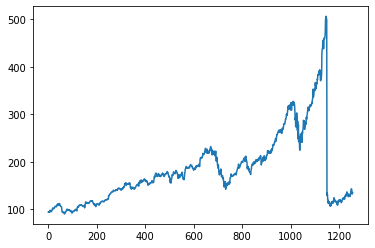

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.00885147],
       [0.01123271],
       [0.01118461],
       ...,
       [0.10010824],
       [0.10535177],
       [0.10739627]])

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
train_data=np.array(train_data)
test_data=np.array(test_data)
training_size,test_size

(879, 378)

In [22]:
train_data[0:5]

array([[0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178]])

In [25]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
import numpy as np
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
## Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 300ms/step - loss: 0.0188 - val_loss: 0.0602
Epoch 2/100
13/13 [==============================] - 3s 192ms/step - loss: 0.0030 - val_loss: 0.0295
Epoch 3/100
13/13 [==============================] - 2s 192ms/step - loss: 0.0010 - val_loss: 0.0257
Epoch 4/100
13/13 [==============================] - 2s 191ms/step - loss: 5.1699e-04 - val_loss: 0.0259
Epoch 5/100
13/13 [==============================] - 2s 192ms/step - loss: 4.0954e-04 - val_loss: 0.0237
Epoch 6/100
13/13 [==============================] - 3s 193ms/step - loss: 3.9170e-04 - val_loss: 0.0230
Epoch 7/100
13/13 [==============================] - 3s 194ms/step - loss: 3.4675e-04 - val_loss: 0.0225
Epoch 8/100
13/13 [==============================] - 2s 193ms/step - loss: 3.3555e-04 - val_loss: 0.0217
Epoch 9/100
13/13 [==============================] - 3s 195ms/step - loss: 3.1214e-04 - val_loss: 0.0210
Epoch 10/100
13/13 [==============================] - 3s 195ms/step

In [43]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

0.009046532992886443
0.07577802012830209


In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.009046532992886443

In [40]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.07577802012830209

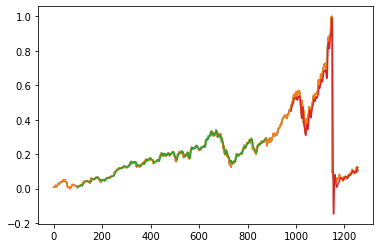

In [48]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot((df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
len(test_data)

378

In [66]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [67]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input[0:5]

[0.055682501503307225,
 0.052098616957306054,
 0.0601683704149128,
 0.06061334936861096,
 0.05241130487071555]

In [71]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

lst_output[0:5]

[0.11155286]
101
1 day input [0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828
 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.

[[0.11155285686254501],
 [0.10804993659257889],
 [0.106211818754673],
 [0.10555323213338852],
 [0.10557590425014496]]

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [73]:
import matplotlib.pyplot as plt
len(df1)

1257

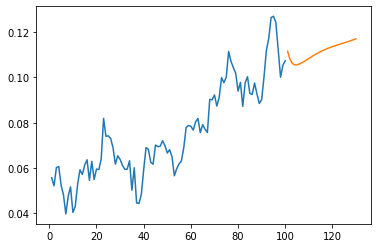

In [74]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

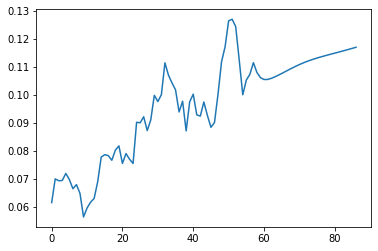

In [75]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

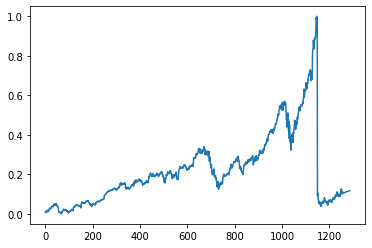

In [76]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)